In [1]:
from math import *
import numpy as np
#from uncertainties import *
#from uncertainties import unumpy as unp
import matplotlib.pylab as plt
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy import special, optimize
from scipy.misc import factorial
import matplotlib
from matplotlib import pyplot as plt
#import ThonkTools as TT
import numpy as np
from uncertainties import ufloat
from uncertainties import unumpy as unp
import matplotlib.pylab as plt
from scipy import interpolate
from scipy.optimize import curve_fit

def errplot(x):
    """takes an uncertainties uarray and returns the 
    tuple (values, errors)
    -values: a numpy array that contains all the values
        of your uncertainties uarray 
    -errors: a numpy array that contains all the errors
        of your uncertainties uarray
    """
    
    values = []
    errors = []
    for i in range(len(x)):
        values.append(x[i].nominal_value)
        errors.append(x[i].std_dev)
    values = np.asarray(values)
    errors = np.asarray(errors)
    return values, errors


def power(i):
    """converts dBm into W 
    """
    return 10**((i-30)/10)

In [2]:
def errorfinder(input):
    from numpy import mean as mean
    from numpy import array as array
    array(input)
    eplus = power(input+1) - power(input)
    eminus = power(input)-power(input-1)
    error = []
    for i in range(len(input)):
        error.append(mean([(eplus[i]), (eminus[i])]))
    return error


In [3]:
#Polarisation der Antenne im GrH

I_GrH3 = np.array([-40.76,-40.75,-41.12,-42.19,-44.27,-47.79,-51.51,-54.06,-54.49,
                  -54.2, -52.53,-41.7,-42.25,-45.01,-47.01,-49.39,-49.14,-50.29,-48.83,
                  -49.32])
fi_GrH3 = np.array([0,10,20,30,40,50,60,65,70,80,90,-10,-20,-30,-40,-50,-60,-70,-80,-90])

x = fi_GrH3*(pi/180)
y = power(I_GrH3)

[  7.97997386e-08   1.27711470e+00   1.12197839e-01   7.05253576e-10]
[  3.89804787e-09   2.97361134e-02   2.58229609e-02   2.00860895e-09]
[phi(0) 1 0 0 ]


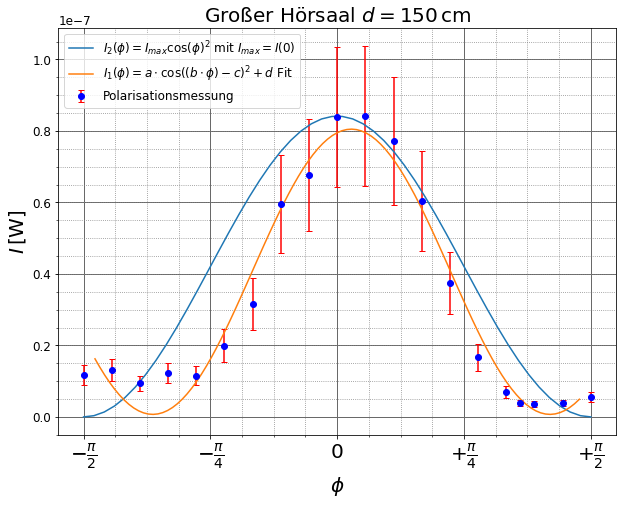

In [13]:
plt.rcParams.update({'font.size': 12})
# def f(x):
#     return  power(I_GrH3)[1]*np.cos(x)**2

def f(x,b,c,d):
    return power(I_GrH3)[1]*np.cos((b * x) - c)**2 + d
#popt, pcov = curve_fit(f, x,y, p0=[0])

def fit(x,a,b,c,d):
    return a * np.cos((b * x) - c)**2 + d

popt, pcov = curve_fit(fit, x, y, p0=[0.00000008,1.3,0,0.000000001])



fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='1', color='dimgray')
ax.grid(which='minor', linestyle=':', color='gray')
ax.set_xticks([-pi/2,-pi/4,0,pi/4,pi/2])
x_label = [r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$0$", r"$+\frac{\pi}{4}$",
           r"$+\frac{\pi}{2}$"]
ax.set_xticklabels(x_label, fontsize=20)

ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#plt.errorbar(d_GrH1, I_GrH1, xerr=u_dGrH, yerr=u_IGrH, fmt='none',
#            color='red')

plt.errorbar(x,y,errorfinder(I_GrH3),fmt='bo', label='Polarisationsmessung', ecolor="red", capsize=3)
plt.plot(np.linspace(-pi/2,pi/2), f(np.linspace(-pi/2,pi/2), 1,0,0),
         label=r'$I_{2}(\phi) = I_{max} \cos(\phi)^{2} \,\,$mit $I_{max} = I(0)$')

angle = np.linspace(-1.5, 1.5, 101)

plt.plot(angle, fit(angle, popt[0], popt[1], popt[2], popt[3]),label=r'$I_{1}(\phi) = a \cdot \cos((b \cdot\phi) - c)^{2} + d$ Fit')

print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)
print("[phi(0)", 1, 0, 0,"]")



plt.legend(loc=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel(r'$\phi$', size=20)
plt.ylabel(r'$I\,$[W]', size = 20)
plt.title(r'Großer Hörsaal $d=150\,$cm', size=20)

plt.savefig(filename='Polarisation-GrH')
plt.show()

In [7]:
#lab
I_lab2 = np.array([-37.46,-37.61,-38.44,-40.43,-43.26,-47.24,-52.33,-52.12,-54.54,
                  -57.94,-37.87,-39.01,-38.59,-40.74,-42.76,-45.96,-48.32,-46.37,
                  -45.78])
fi_lab2 = np.array([0,10,20,30,40,50,60,70,80,90,-10,-20,-30,-40,-50,-60,-70,-80,-90])
x2 = fi_lab2 * (pi/180)
y2= power(I_lab2)#[:-2]
print(x2)
print(y2)

[ 0.          0.17453293  0.34906585  0.52359878  0.6981317   0.87266463
  1.04719755  1.22173048  1.3962634   1.57079633 -0.17453293 -0.34906585
 -0.52359878 -0.6981317  -0.87266463 -1.04719755 -1.22173048 -1.3962634
 -1.57079633]
[  1.79473363e-07   1.73380400e-07   1.43218790e-07   9.05732601e-08
   4.72063041e-08   1.88799135e-08   5.84790084e-09   6.13762005e-09
   3.51560441e-09   1.60694125e-09   1.63305195e-07   1.25602996e-07
   1.38356638e-07   8.43334758e-08   5.29663444e-08   2.53512863e-08
   1.47231250e-08   2.30674719e-08   2.64240876e-08]


[  1.69733014e-07   1.21519960e+00  -6.12830747e-02   1.15652281e-09]
[  9.61494998e-09   3.94509352e-02   3.04594549e-02   5.15773857e-09]
[phi(0) 1 0 0 ]


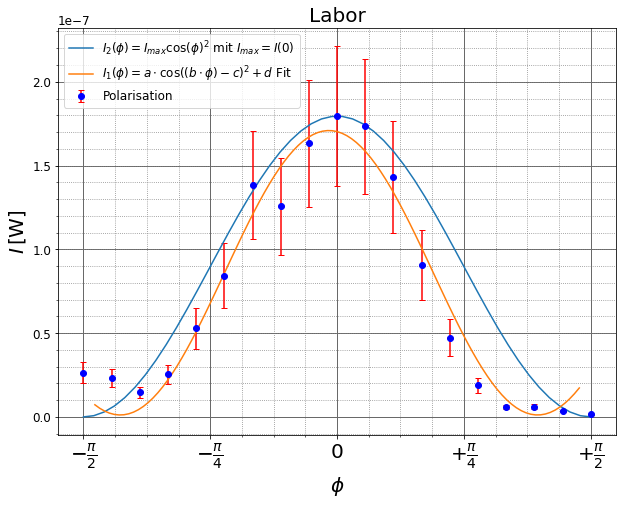

In [14]:
def f1(x,b,c,d):
    return power(I_lab2)[0]*np.cos((b * x) - c)**2 + d

#popt, pcov = curve_fit(f1, x2, y2, p0=[0])

def fit1(x,a,b,c,d):
    return a * np.cos((b * x) - c)**2 + d

popt, pcov = curve_fit(fit1, x2, y2, p0=[0.00000008,1.3,0,0.000000001])

plt.rcParams.update({'font.size': 12})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='1', color='dimgray')
ax.grid(which='minor', linestyle=':', color='gray')
ax.set_xticks([-pi/2,-pi/4,0,pi/4,pi/2])
x_label = [r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$0$", r"$+\frac{\pi}{4}$",
           r"$+\frac{\pi}{2}$"]
ax.set_xticklabels(x_label, fontsize=20)

ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.errorbar(fi_lab2 * (pi/180),power(I_lab2),errorfinder(I_lab2),fmt='bo', label='Polarisation',  ecolor="red", capsize=3)
plt.plot(np.linspace(-pi/2,pi/2),f1(np.linspace(-pi/2,pi/2), 1, 0, 0),
         label=r'$I_{2}(\phi) = I_{max} \cos(\phi)^{2} \,\,$mit $I_{max} = I(0)$')


angle = np.linspace(-1.5, 1.5, 101)

plt.plot(angle, fit1(angle, *popt),label=r'$I_{1}(\phi) = a \cdot \cos((b \cdot\phi) - c)^{2} + d$ Fit')

print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)
print("[phi(0)", 1, 0, 0,"]")



plt.legend(loc=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel(r'$\phi$', size=20)
plt.ylabel(r'$I\,$[W]', size = 20)
plt.title('Labor', size=20)

plt.savefig(filename='Polarisation-Labor')
plt.show()

#print(popt1)

In [10]:
# np.linspace(-pi/2,pi/2,10)

In [11]:
a = np.array([1,2,3,4,5])

In [12]:
a[:-2]

array([1, 2, 3])